## MLG Cangrejos satelites (Caso binomial)
#### Oscar Julian Layton

Consideramos un conjunto de datos que tiene como objetivo estudiar la probabilidad de que un
cangrejo herradura hembra tenga algún cangrejo macho viviendo cerca (satélite) para una muestra
de 173 cangrejos de esta especie. Se define Y=1 si la hembra tiene al menos un satélite y Y=0 si ella
no tiene ninguno. Se consideran tres variables explicativas:

* **Color:** Color del caparazón (Dark, Brigth).
* **Columna** Condición de la columna vertebral (s=1 buena, s=0 deteriorada).
* **Weidth**  Ancho del caparazón en centímetros.
* **Satellite** Condición del escarabajo (Satellite=1 tiene almenos un satellite, Satellite=0 no tiene ningun satellite). **Esta es considerada como la RTA**

Aquí $m_k$ es igual apra todo el mundo, no se tiene la necesidad de dividir el satelite sobre nada (la RTA no se divide en nada).

* $m_k Y_k \sim Binomial(m_k, \mu_k)$
* $\mu_k$ : El número de ensayos. es igual a 1

In [2]:
getwd()
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas")#asignando capeta busqueda

[1] "C:/Users/YULY"

In [3]:
library(readxl)
cangrejos2 <- read_excel("cangrejos.xlsx")                                         #Leyendo Archivos.
colnames(cangrejos2)<-c("color","columna","width","satellite")                     #Estableciendo nombre de columnas.
cangrejos <-within(cangrejos2,{color <- factor(color, levels=c("Bright","Dark") )})#organizando niveles, Brillante=0, Dark=1
head(cangrejos2,n=13)

color,columna,width,satellite
Bright,0,28.3,1
Dark,0,26.0,1
Dark,0,25.6,0
Dark,1,21.0,0
Bright,0,29.0,1
Bright,1,25.0,1
Dark,0,26.2,0
Bright,0,24.9,0
Bright,1,25.7,1
Bright,0,27.5,1


En lo que corresponde a las información anteriormente suministrada se logra identificar que el color está determinado por Dark=Oscuro y Bright=Brillante, considerando que la respuesta $Y$ es bernoulli, se genera el siguiente modelo lineal generealizado con función de enlace logit:


### Función de enlace logit

In [4]:
fit1<-glm(satellite~width*color, family = binomial("logit"), data = cangrejos)  #factor para identificar cuales toma como 1ons
summary(fit1)


Call:
glm(formula = satellite ~ width * color, family = binomial("logit"), 
    data = cangrejos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0224  -0.9898   0.5662   0.8512   1.9783  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)   
(Intercept)      -9.3641     3.3597  -2.787  0.00532 **
width             0.3927     0.1287   3.052  0.00227 **
colorDark        -5.6067     5.6084  -1.000  0.31745   
width:colorDark   0.1925     0.2175   0.885  0.37613   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 190.31  on 169  degrees of freedom
AIC: 198.31

Number of Fisher Scoring iterations: 4


In [5]:
#model.matrix(fit1)                #Matriz modelo
coef(fit1)                         #Estimación de los parámetros
vcov(fit1)                         #Matriz de varianza y covarianza 
#fitted(fit1)                      #Valores ajustados
deviance(fit1)                     #Deviance residual
sum(resid(fit1,type="pearson")^2)  #Estadística de Pearson
-2*logLik(fit1)                    # Log-verosimilitud
AIC(fit1)
BIC(fit1)
attributes(fit1)                  #otros atributos

(Intercept)           width       colorDark width:colorDark 
     -9.3640604       0.3927057      -5.6067078       0.1924582

,(Intercept),width,colorDark,width:colorDark
(Intercept),11.2875553,-0.43129269,-11.2875553,0.43129269
width,-0.4312927,0.01655673,0.4312927,-0.01655673
colorDark,-11.2875553,0.43129269,31.4539136,-1.21701261
width:colorDark,0.4312927,-0.01655673,-1.2170126,0.04728658


[1] 190.3122

[1] 166.4458

'log Lik.' 190.3122 (df=4)

[1] 198.3122

[1] 210.9254

$names
 [1] "coefficients"      "residuals"         "fitted.values"    
 [4] "effects"           "R"                 "rank"             
 [7] "qr"                "family"            "linear.predictors"
[10] "deviance"          "aic"               "null.deviance"    
[13] "iter"              "weights"           "prior.weights"    
[16] "df.residual"       "df.null"           "y"                
[19] "converged"         "boundary"          "model"            
[22] "call"              "formula"           "terms"            
[25] "data"              "offset"            "control"          
[28] "method"            "contrasts"         "xlevels"          

$class
[1] "glm" "lm"

Considerando que se está haciendo un modelo, se estudia que posibles valores son los ideales en el modelo, para esto se usa el procedimiento paso a paso mediante la función **step_glm()**

In [19]:
#ESTAS LINEAS ES PARA LLAMAR LAS FUNCIONES REALIZADAS POR EL DOCENTE hernando vanegas
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas") #busca por default en una carpeta en especifica todo.
source("macros.txt")#Lllamar el archivo de macros que está en la carpeta especifica,(son una fuciines especificas del profesor)


step_glm(fit1,direction = "forward",criterion = "BIC")  # direction="backward" o "forward"


  Family:  binomial 
    Link:  logit 

Initial model:
satellite ~ 1  

Step 0 :    
        Df      BIC      AIC   Deviance+ Pearson^  p-value*
+ width  1   204.7592 198.4527    0.1336   0.0398 1.021e-06
+ color  1   226.8376 220.5311    0.0353  -0.0058    0.0026
<none>       230.9118 227.7585    0.0000   0.0000          

Step 1 :  + width 
        Df      BIC      AIC   Deviance+ Pearson^ p-value*
<none>       204.7592 198.4527    0.1336   0.0398         
+ color  1   206.5781 197.1183    0.1435   0.0200   0.0675

+ Adjusted R-squared based on the residual deviance
^ Adjusted R-squared based on the Pearson statistic
* p-value of the Wald test

Final model:
satellite ~ 1 + width 



El anterior codigo establece el mejor modelo. Si usamos el proceso forward, establece: 

* **modelo inicial**:El que solo tiene intercepto.
* **paso 0**: ¿Cuál agragar color o ancho del caparazón? Si se agrega el ancho del caparazon **BIC=204.7592** indica que se debe realizar al igual que el AIC=198.45 luego es aconsejable colocar el efecto principal width (ancho del caparazon). Con respecto al R^2 basado en desvio (DECIANCE+) tambien (porque es el mayor).  Con el $R^2_{p}$ basado en la estadística Pearson también (entre mayor mejor). Según el p-valor se establece que hay que ingresar este efecto principal (cuanto menor mejor).   **CONCLUSIÓN: colocar el efecto principal With**.

* **paso 1**: se tienen la posibilidad o de ingresar color o no hacer nada, esto puede decidirse con el BIC, AIC los cuales indican que es mejor no hacer nada,  observandose el $R^2_p$ establece que no hay que colocar mas efectos igual que AIC-BIC. No obstante el **P-valor** y el  $R^2_D$ indican lo contrario (es decir se debe adicionar color)

Luego el modelo final es:

$$satellite = 1 + width$$

Suponiendo que el mejor modelo es el establecido por 

$$satellite = 1 + width+color$$

A continuación se presenta los modelos dependiendo de la función de enclace y 
$satellite = 1 + width$, para luego analizar los AIC,BIC,$R^2_{D}$,$R^2_{P}$ 

### Función de enlace probit

In [20]:
fit2<-glm(satellite~width*color, family = binomial("probit"), data = cangrejos)#factor para identificar cuales toma como 1ons
summary(fit2)


Call:
glm(formula = satellite ~ width * color, family = binomial("probit"), 
    data = cangrejos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.0396  -0.9991   0.5606   0.8516   1.9919  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)   
(Intercept)     -5.62489    1.93552  -2.906  0.00366 **
width            0.23608    0.07358   3.209  0.00133 **
colorDark       -3.48596    3.19391  -1.091  0.27508   
width:colorDark  0.12034    0.12347   0.975  0.32977   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 189.95  on 169  degrees of freedom
AIC: 197.95

Number of Fisher Scoring iterations: 5


### Función de enlace cloglog

In [21]:
fit3<-glm(satellite~1+width+color, family = binomial("cloglog"), data = cangrejos)#factor para identificar cuales toma como 1ons
summary(fit3)


Call:
glm(formula = satellite ~ 1 + width + color, family = binomial("cloglog"), 
    data = cangrejos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2006  -1.0045   0.5126   0.9335   1.6743  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.43013    1.61857  -4.591 4.42e-06 ***
width        0.28970    0.06053   4.786 1.70e-06 ***
colorDark   -0.35183    0.22562  -1.559    0.119    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 190.90  on 170  degrees of freedom
AIC: 196.9

Number of Fisher Scoring iterations: 6


In [22]:
AIC(fit1,fit2,fit3)  
BIC(fit1,fit2,fit3)   #No dan lo mismo porque tienen diferente cantidad de parámetros

,df,AIC
fit1,4,198.3122
fit2,4,197.9547
fit3,3,196.8951


,df,BIC
fit1,4,210.9254
fit2,4,210.5678
fit3,3,206.3550


Se observa que el mejor modelo es el ajuste 3 el cual corresponde al que usa la función de enlace **cloglog**.  No obstante observese los siguientes $R^2_{D}$,$R^2_{P}$

In [23]:
#ESTAS LINEAS ES PARA LLAMAR LAS FUNCIONES REALIZADAS POR EL DOCENTE hernando vanegas
setwd("C:\\Users\\YULY\\Desktop\\Desktop\\UNAL 2018\\MLGz\\MLG Vanegas") #busca por default en una carpeta en especifica todo.
source("macros.txt")#Lllamar el archivo de macros que está en la carpeta especifica,(son una fuciines especificas del profesor)

gof_glm(fit1)   #analisis del logit
gof_glm(fit2)
gof_glm(fit3)   #analisis del complementologlog


  Family:  binomial 
    Link:  logit 
                                                     Df    Value
Residual deviance                                   169 190.3122
Pearson's statistic                                 169 166.4458
Adjusted R-squared based on the residual deviance         0.1420
Adjusted R-squared based on the Pearson's statistic       0.0208
-2*log-Likelihood                                       190.3122
AIC                                                     198.3122
BIC                                                     210.9254



  Family:  binomial 
    Link:  probit 
                                                     Df    Value
Residual deviance                                   169 189.9547
Pearson's statistic                                 169 166.5049
Adjusted R-squared based on the residual deviance         0.1437
Adjusted R-squared based on the Pearson's statistic       0.0205
-2*log-Likelihood                                       189.9547
AIC    

Con respecto a lo anterior también es aconsejable el modelo ocn enlace **cloglog** pues es el que mejor se ajusta.

#### Calculando $R_{D}^2$ del modelo con enlace cloglog

$$R^2_{D}=1-\frac{Deviance mejor modelo}{Deviance peor modelo}=\frac{\frac{190.90}{170}}{\frac{225.76}{172}}$$

**NOTA:** EL Deviance del peor modelo en términos de ajuste es aquel que todos los betas son iguales a cero menos el intercepto.

In [24]:
Rd<- 1-(fit3$deviance/170)/(fit3$null.deviance/172); Rd    #Este valor tambien es el que aparece en     gof_glm(fit3) 

[1] 0.14448

# MODELO FINAL (CON FUNCION DE ENLACE CLOGLOG)

In [37]:
fit3<-glm(satellite~1+width+color, family = binomial("cloglog"), data = cangrejos)#factor para identificar cuales toma como 1ons
summary(fit3)


Call:
glm(formula = satellite ~ 1 + width + color, family = binomial("cloglog"), 
    data = cangrejos)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2006  -1.0045   0.5126   0.9335   1.6743  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -7.43013    1.61857  -4.591 4.42e-06 ***
width        0.28970    0.06053   4.786 1.70e-06 ***
colorDark   -0.35183    0.22562  -1.559    0.119    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 225.76  on 172  degrees of freedom
Residual deviance: 190.90  on 170  degrees of freedom
AIC: 196.9

Number of Fisher Scoring iterations: 6


---

## Test de Wald


 Ahora para hacer una hipótesis sobre la dosis, considero a $\beta_2$. 

$$H_{0}: \beta_2 = 0 \;\;\;\;\; vs \;\;\;\;\;\; H_{1}: \beta_2 \neq  0 $$

donde 

$$ \xi _{W} = (\hat{\beta_2}  - \beta_2^{0})' [\hat{Var}(\hat{\beta_2})]{-1}(\hat{\beta_2}  - \beta_2^{0})$$


Para hacer inferencia con respecto a los datos se tiene:

* Consideranddo que $Z_{\hat{\beta_2}}=4.786$, se contrasta con la estadistica normal (concluyendose que se rechaza $H_0$, ver significancia de $\beta_2$).

* $ \xi _{W} = 22.90$ que al ser contrastado con una chi cuadrado con un grado de libertad $\chi^2_{1}$ se tiene: $ 22.9=\xi _{W} > \chi^2_{1} =3.8416$ es decír que a un nivel de significancia aproximado de $100(\alpha)\%$ se rechaza la hiótesis nula. concluyendose que el ancho del caparazon actúa de manera significativa en el tener satelites.

* considerando lo anterior $(Z_{\hat{\beta_2}})^2=(4.786)^2 = \xi _{W} =  22.90$ se tiene la misma desición. veamos el calculo de la estadística de Wald y el p-valor:


In [39]:
(coef(fit3)[c(2)])^2 /(vcov(fit3)[c(2), c(2)])     #test de wald

width 
22.90567

In [41]:
pvalor<- 1-pchisq(( 22.90)^2,1);pvalor

[1] 0

<div class="alert alert-success">
    <b>Desición:</b>
    
Se rechaza la hipótesis nula $H_{0}: \beta_2 =0$ luego es sigfnificativo, concluyendose que el ancho del caparazon si está afectando la probabilidad de exito $\mu_k$
</div>

<div class="alert alert-danger" role="alert">
    <b>Nota:</b>
    
Recuerde que se compara con una $\chi^2_{(1)}$ con un grado de libertad porque es solo un parámetro. $\chi^2_{(1)}=(Z_{\alpha})^2=(1.96)^2=3.8416$
</div>

---

## Test de razón de verosimilitudes

Para evaluar si:

$$H_{0}: \beta_2 = 0 \;\;\;\;\; vs \;\;\;\;\;\;H_{1}: \beta_2 \neq  0 $$

Considerando que el test de verosimilitudes está determinado por: $\xi _{RV}=2[l(\hat{\beta})-l(\hat{\beta^{o}})]$ sumando y restando $\hat{\beta}$ del modelo saturado se obtiene:

$$\xi _{RV}=2[l(\hat{\beta})-l(\hat{\beta^{o}})]=\phi^{-1} [D(y;\hat{\mu}^0)-D(y;\hat{\mu})]  $$

Donde $D(y;\hat{\mu}^0)$ es el desvio del modelo restringido llamado **Null Deviance** y donde $D(y;\hat{\mu})$ es el desvio del modelo sin restricción llamado **Residual Deviance**

**Null Deviance** Es el desvio de un modelo donde todos los betas excepto el intercepto son iguales a cero.


Luego como $\phi=1$ se tiene:

$$\xi _{RV}=Null deviance- Residual Deviance=225.76 - 190.90 =34.86$$

<div class="alert alert-success">
    <b>Desición:</b>
    
Luego se rechaza $H_0$ a un nivel de significancia APROXIMADO del $ 100(\alpha)\%$ puesto que $34.86=\xi _{RV}>\chi^2(1) =3.8416$ A firmandose que es significativo en el modelo. 

* Se rechaza igual como se realizó en el test de Wald
</div>




In [43]:
fit3$null.deviance-fit3$deviance

[1] 34.86342

## Gráficas

Loading required package: sqldf
Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


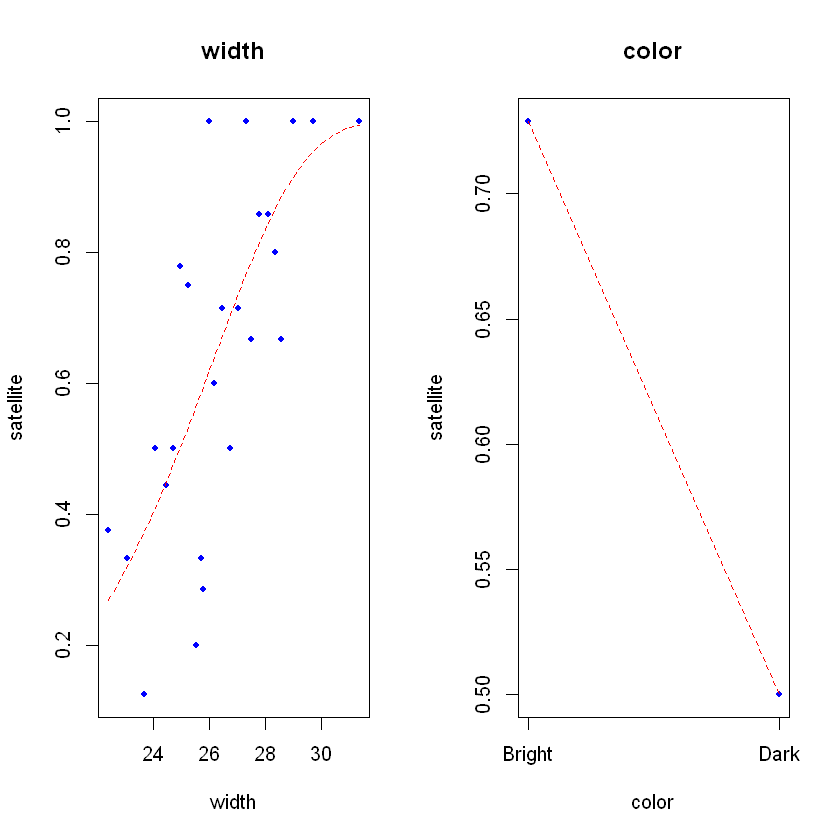

In [27]:
#install.packages("sqldf", "/Users/YULY/anaconda/Lib/R/library")
require(sqldf)
graphs_glm(fit.model =fit3,a=1,b=2,col = "blue" ,ngroup=30)   
#el (a,b)=(2,2) establece cantidad de graficas matriz(1*1), ngroup=8, pch=  ,col=

## Análisis de sensibilidad

La siguiente gráfica es la de los residuos cuantil, mediante la función **residuals_glm()** la cual es generada por defecto.

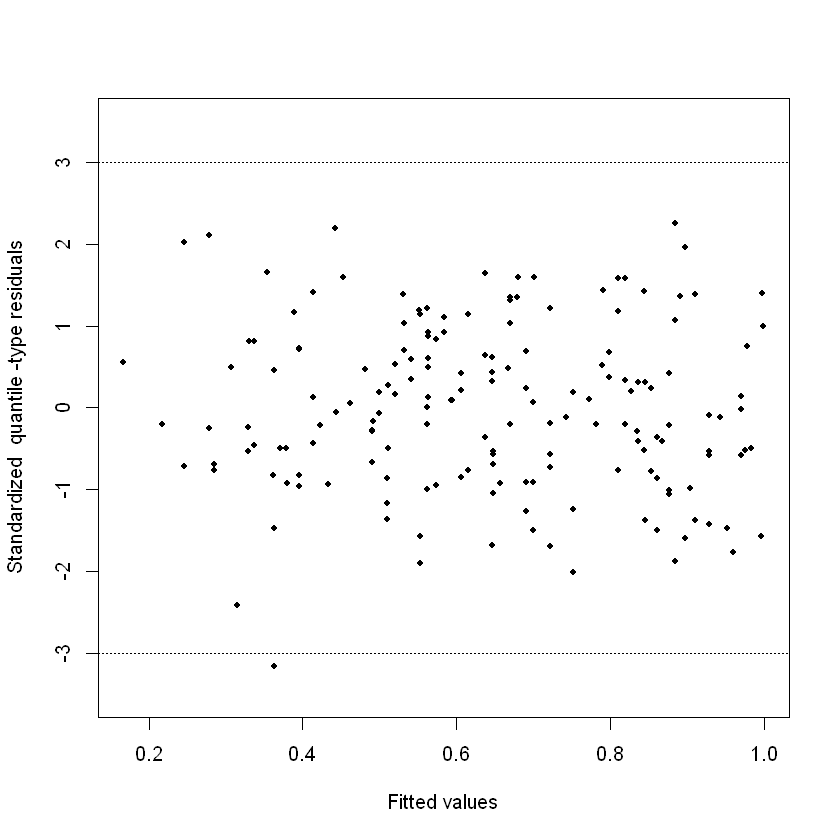

In [28]:
residuals_glm(fit3)   #Por default residuos quantile

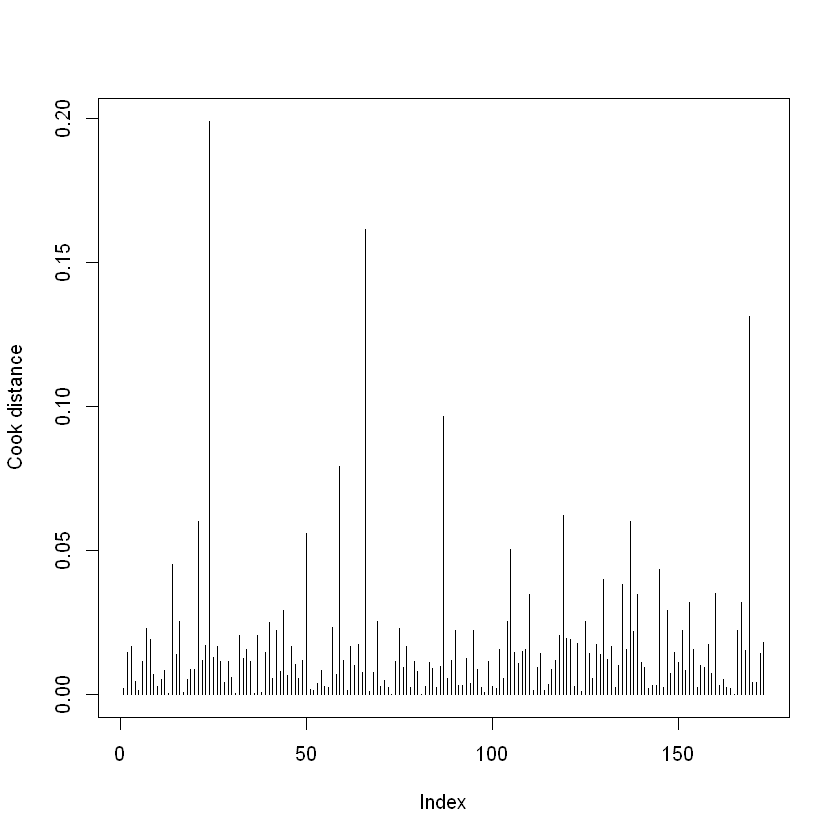

In [29]:
Cookdis_glm(fit3)   #hay que quitar la observacion 94,128

### ¿Qué sucede si quitamos los puntos alto leverage?

Quitando el dato 128 se tiene:

In [30]:
case.deletion_glm(fit3,subset = c(-128))


            Estimate  Std. Error   Pr(>|z|)  | Estimate* Std. Error*  Pr(>|z|)*
(Intercept)  -7.43013     1.61857     0.0000 |  -7.41292     1.61524     0.0000
width         0.28970     0.06053     0.0000 |   0.28906     0.06040     0.0000
colorDark    -0.35183     0.22562     0.1189 |  -0.32803     0.22601     0.1467
            | Change(%)
(Intercept) |     0.232
width       |    -0.222
colorDark   |     6.764

(*) estimates, standard errors and p-values obtained using the specified subset of individuals.


**(Continúa el signo y la significancia)**

La estimación del intercepto aumentó un $2\%$, mientras que la estimación de $\beta_2$ disminuyó $2\%$ todo al quitar la observación 128. con respecto a color se tiene que  $\beta_3$ aumentó $6.7\%$  No obstante la significancia permaneció prácticamente igual lo cual indica que al quitar el dato 128 las cosas siguen siendo prácticamente iguales con respecto a la significancia.

# Interpretación de los $\beta$ dada la función de enlace Logit


  $\;$
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           n_k Y_k \sim Binomial(n_k, \mu_k)\\
		 g(\mu_k)=\mathbf{x}_k'\beta = \beta_1 + \beta_2 x_{k} + \beta_3 x_{k3} \\
		 Y_1,  Y_2, ..., Y_n
	       \end{array}
	     \right.
   \end{equation*}
   $$
   
   
$$\begin{equation*}
     \left\{
	       \begin{array}{ll}
           n_k Y_k \sim Binomial(n_k, \mu_k)\\
		 log(\frac{\mu_k}{1-\mu_k})=\mathbf{x}_k'\beta = \beta_1 + \beta_2 Width_{k2} + \beta_3 Color_{k3} \\
		 Y_1,  Y_2, ..., Y_n
	       \end{array}
	     \right.
   \end{equation*}
   $$
   
   

Al tratarse de la función de enlace **logit** donde:

$$log(\frac{\mu_k}{1-\mu_k})= \beta_1 + \beta_2 Width_{k} +  \beta_3 Color_{k}$$

--- 

Aplicando exponencial y considerando que tener color **Oscuro:Dark=1** se tiene:

 $$\frac{\mu_k}{1-\mu_k} = \frac{ exp[ \beta_1 + \beta_2 Width_{k} +  \beta_3 Color_{k}]}{ exp[ \beta_1 + \beta_2 Width_{k} +  \beta_3 Color_{k}]} = exp(\beta_3)=exp(-0.351) $$
 
Al suponer que $\hat{\beta}_3=-0.351$, se tiene:

  $$exp(\hat{\beta}_3) = exp(-0.351)=  0.70398$$
 
* **Interpretación color:** Al comparar dos cangrejos, los dos con el mismo peso uno oscuro y uno brillante. El chance de tener un satélite oscuro es $29\%$ menor que el brillante.

---

Caso variable continua:

 $$\frac{\mu_k}{1-\mu_k} = \frac{ exp[ \beta_1 + \beta_2 (X_{0}+\delta) +  \beta_3 Color_{k}]}{ exp[ \beta_1 + \beta_2 X_{0} +  \beta_3 Color_{k}]} = exp(\beta_2 \delta) $$
 
Considerando que $\hat{\beta}_2=0.289$, se tiene:

  $$exp(\hat{\beta}_2) = exp(0.289)= 1.335$$
 
* **Interpretación ancho:** Por cada unidad adicional en el ancho del caparazon, el chance de tener almenos un satelite aumenta $33\%$.

<div class="alert alert-danger" role="alert">
    <b>Nota:</b>
    
Recuerde que $\delta$ depende de las unidades por ejemplo si se trata de x son cada 10.000 habitantes , $\delta=10000$
</div>

In [34]:
coef(fit3)

(Intercept)       width   colorDark 
 -7.4301290   0.2897014  -0.3518265

# REFERENCIAS

Para poder instalar paquetes en jupyter, uso la siguiente linea.

* install.packages("glmx", "/Users/YULY/anaconda/Lib/R/library")